<a href="https://colab.research.google.com/github/jullyoemmanuel/Tecnicas-de-machine-learning/blob/main/Aula_13_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
titanic = sns.load_dataset('titanic')

feature_names = ['pclass','female','age','fare']
titanic['female'] = titanic['sex'].map({'male':0,'female':1})
titanic.dropna(subset = feature_names, inplace = True) 

In [ ]:
X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 123)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(714, 4) (535, 4) (179, 4)


In [ ]:
mode1 = keras.models.Sequential()
mode1.add(keras.layers.Dense(4, activation = 'relu', input_shape = X_train[0].shape))

mode1.add(keras.layers.Dropout(0.2))
mode1.add(keras.layers.Dense(1, activation = 'sigmoid'))
mode1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mode1.compile(loss = keras.losses.binary_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
batch_size = 32
epochs = 100

history = mode1.fit(X_train,y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test,y_test))

Epoch 1/100
17/17 [==============================] - 2s 15ms/step - loss: 11.7132 - accuracy: 0.4449 - val_loss: 7.1484 - val_accuracy: 0.4134
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 9.8731 - accuracy: 0.4318 - val_loss: 6.7141 - val_accuracy: 0.3855
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 9.4721 - accuracy: 0.4150 - val_loss: 6.3109 - val_accuracy: 0.3631
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 9.2030 - accuracy: 0.4299 - val_loss: 5.8889 - val_accuracy: 0.3128
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 9.3759 - accuracy: 0.3664 - val_loss: 5.4774 - val_accuracy: 0.3184
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 8.5613 - accuracy: 0.3813 - val_loss: 5.0740 - val_accuracy: 0.4246
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 8.1023 - accuracy: 0.4449 - val_loss: 4.7127 - val_accuracy: 0.5419
Epoch 8/100

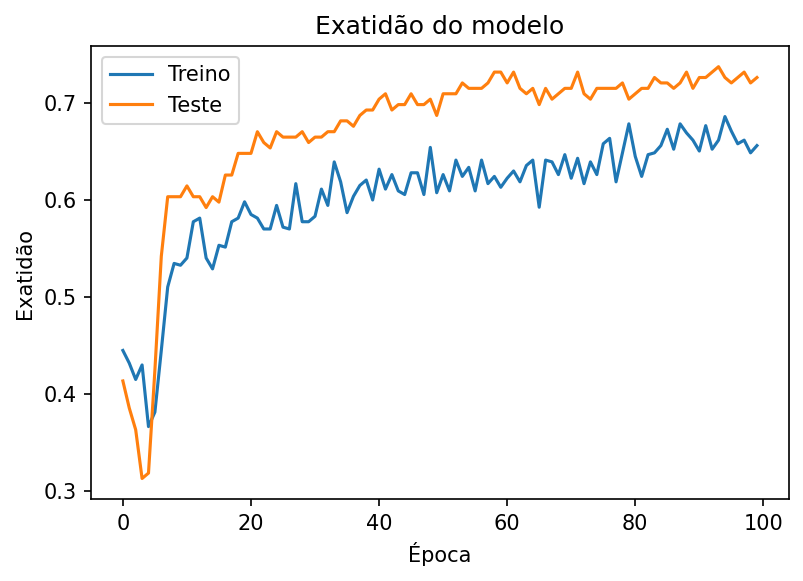

In [ ]:
import matplotlib
import matplotlib.pyplot as plt 

matplotlib.rcParams['figure.dpi'] = 150

# Plot acurácia de treino e validação

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino','Teste'], loc = 'upper left')
plt.show()